In [60]:
#!pip install plotly

In [61]:
# Importing all the project pre-requisites
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sb.set()

# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz


# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Import essential models and functions from plotly
import plotly
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Allows us to use Plotly offline
init_notebook_mode(connected=True)

In [62]:
df=pd.read_csv("World Happiness Report.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [63]:
df.shape

(158, 12)

In [64]:
# Information about the Variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [86]:
# Convert all Variable Names to UPPERCASE
df.columns = df.columns.str.upper()

In [96]:
# Remove all spaces from Variable Names

df.columns = df.columns.str.replace(" ","_",regex=True)
df.columns = df.columns.str.replace("(","",regex=True)
df.columns = df.columns.str.replace(")","",regex=True)

In [92]:
df.head()

,COUNTRY,REGION,HAPPINESS_RANK,HAPPINESS_SCORE,STANDARD_ERROR,ECONOMY_(GDP_PER_CAPITA),FAMILY,HEALTH_(LIFE_EXPECTANCY),FREEDOM,TRUST_(GOVERNMENT_CORRUPTION),GENEROSITY,DYSTOPIA_RESIDUAL
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [97]:
# Rename the columns of the dataframe for easier readability
data.rename(columns = {'ECONOMY_(GDP_PER_CAPITA)': 'GDP_PER_PERSON'}, inplace = True)
data.rename(columns = {'HEALTH_(LIFE_EXPECTANCY)': 'HEALTH_LIFE_EXPECTANCY'}, inplace = True)
data.rename(columns = {'TRUST_(GOVERNMENT_CORRUPTION)': 'TRUST_GOVERNMENT_CORRUPTION'}, inplace = True)

In [98]:
df.head()

,COUNTRY,REGION,HAPPINESS_RANK,HAPPINESS_SCORE,STANDARD_ERROR,ECONOMY_GDP_PER_CAPITA,FAMILY,HEALTH_LIFE_EXPECTANCY,FREEDOM,TRUST_GOVERNMENT_CORRUPTION,GENEROSITY,DYSTOPIA_RESIDUAL
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [99]:
# Calculate the complete correlation matrix
df.corr().round(2)

,HAPPINESS_RANK,HAPPINESS_SCORE,STANDARD_ERROR,ECONOMY_GDP_PER_CAPITA,FAMILY,HEALTH_LIFE_EXPECTANCY,FREEDOM,TRUST_GOVERNMENT_CORRUPTION,GENEROSITY,DYSTOPIA_RESIDUAL
HAPPINESS_RANK,1.00,-0.99,0.16,-0.79,-0.73,-0.74,-0.56,-0.37,-0.16,-0.52
HAPPINESS_SCORE,-0.99,1.00,-0.18,0.78,0.74,0.72,0.57,0.40,0.18,0.53
STANDARD_ERROR,0.16,-0.18,1.00,-0.22,-0.12,-0.31,-0.13,-0.18,-0.09,0.08
ECONOMY_GDP_PER_CAPITA,-0.79,0.78,-0.22,1.00,0.65,0.82,0.37,0.31,-0.01,0.04
FAMILY,-0.73,0.74,-0.12,0.65,1.00,0.53,0.44,0.21,0.09,0.15
HEALTH_LIFE_EXPECTANCY,-0.74,0.72,-0.31,0.82,0.53,1.00,0.36,0.25,0.11,0.02
FREEDOM,-0.56,0.57,-0.13,0.37,0.44,0.36,1.00,0.49,0.37,0.06
TRUST_GOVERNMENT_CORRUPTION,-0.37,0.40,-0.18,0.31,0.21,0.25,0.49,1.00,0.28,-0.03
GENEROSITY,-0.16,0.18,-0.09,-0.01,0.09,0.11,0.37,0.28,1.00,-0.10
DYSTOPIA_RESIDUAL,-0.52,0.53,0.08,0.04,0.15,0.02,0.06,-0.03,-0.10,1.00


<AxesSubplot:>

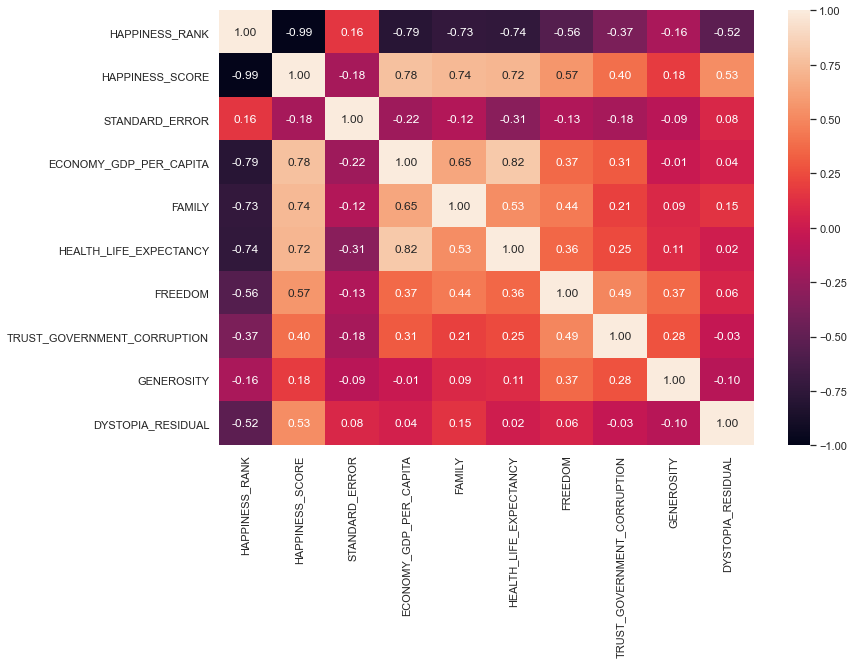

In [101]:
# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(12, 8))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [104]:
#Categortising the happiness of each country using our Happiness Categorisation
# Add our Happiness Category into the Happiness_Score dataframe

happiness=[]
for i in happiness_score["Happiness Score"]:
    if i<4:
        happiness.append("UNHAPPY")
    elif 4<=i<=6:
        happiness.append("NORMAL")
    else:
        happiness.append("HAPPY")

# Join our Hapiness_Score dataframe into the main dataframe

pred_happiness = pd.DataFrame(happiness,columns=["PREDICTED_HAPPINESS"])
pred_happiness = pd.DataFrame(pred_happiness["PREDICTED_HAPPINESS"].astype('category'))
df = pd.concat([df,pred_happiness],axis=1)

In [106]:
df.head()

,COUNTRY,REGION,HAPPINESS_RANK,HAPPINESS_SCORE,STANDARD_ERROR,ECONOMY_GDP_PER_CAPITA,FAMILY,HEALTH_LIFE_EXPECTANCY,FREEDOM,TRUST_GOVERNMENT_CORRUPTION,GENEROSITY,DYSTOPIA_RESIDUAL,PREDICTED_HAPPINESS
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,UNHAPPY
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NORMAL
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NORMAL
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NORMAL
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,HAPPY


In [107]:
#Count of Happiness based on our categorisation

df["PREDICTED_HAPPINESS"].value_counts()

NORMAL     93
HAPPY      44
UNHAPPY    21
Name: PREDICTED_HAPPINESS, dtype: int64

In [139]:
import warnings
warnings.filterwarnings('ignore')

In [140]:
predictors=["ECONOMY_GDP_PER_CAPITA","HEALTH_LIFE_EXPECTANCY","FREEDOM","GENEROSITY","TRUST_GOVERNMENT_CORRUPTION"]
x=pd.DataFrame(df[predictors])
y=pd.DataFrame(df["HAPPINESS_SCORE"])

In [141]:
# Split the Dataset into Train and Test with a test size of 0.25
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state = 42)

In [142]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
print("Training set R^2:", linreg.score(x_train, y_train))
print("Test set R^2:", linreg.score(x_test, y_test))

Training set R^2: 0.7117876255015498
Test set R^2: 0.7165303643129479


In [143]:
#save the model(Linear Regression)
import joblib
#save the model as pickle in file
joblib.dump(linreg,'world_happiness_report.pkl')

['world_happiness_report.pkl']